# Stage 4: Baseline Model ‚Äì AI-Driven Stylistic Quote Generation

In this stage, we present our baseline deep learning model for generating stylistic quotes that reflect different themes in poetic or reflective tones.

We experiment with multiple approaches:
- Fine-tuning a GPT-2 language model (Model 1)
- STYLEMC-based scoring and reranking (Model 2)
- BART for controlled generation using prompt-based infill (Model 3)

We evaluate all models using training loss, style similarity, semantic similarity, and fluency metrics.


In [ ]:
!pip install transformers datasets accelerate -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 491.2/491.2 kB 8.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 4.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183.9/183.9 kB 5.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 8.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 23.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
!pip install datasets

In [ ]:
!pip install -U sentence-transformers

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 340.6/340.6 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.4.1
    Uninstalling sentence-transformers-3.4.1:
      Successfully uninstalled sentence-transformers-3.4.1


1) **Option 1:** Fine-Tune GPT-3 (√† la Sawicki et al.)
How: Use OpenAI‚Äôs GPT-3.5 or GPT-3 model (Curie or Babbage recommended for cost-effectiveness) and fine-tune it on your dataset with structured metadata (summary + topic + tone).

- *Already proven with just 300 poems.*

- *You can use blog summaries or your quote themes as prompts.*

- *Ideal if you want precise stylistic mimicry + creative generation.*

2) **Option 2:** STYLEMC (Khan et al.) - Contrastive Stylometry + Style Vector Control
How: Train a lightweight regressor on your data to learn your style vector, then guide text generation from a pretrained language model (like OPT or T5) to match your stylometric fingerprint.

- *Great for preserving subtle writing traits.*

- *Requires building a small energy-based model (EBM) + sampling via in-filling (e.g., with T5).*

- *Excellent for anonymization, stylistic consistency, and text refinement.*

3) **Option 3:** TextSETTR (Riley et al.) ‚Äì Few-Shot Style Transfer Using T5
How: Extract style from a few examples, then apply ‚Äútargeted restyling‚Äù using summary + style vector as input.

- *Works best when you want to re-style a base sentence into your voice.*

- *Best suited for adapting generic AI-generated output into your personal style.*



In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#check files on drive
!ls "/content/drive/MyDrive/6165 AI ML Project"

 Annotated_Quotes.csv			   merged_df.csv
 cleaned_authorship_dataset.csv		   Refined_BART_Training_Dataset.csv
 Final_FineTuning_Dataset.csv		   rephrased_gpt_dataset.csv
 Final_Unique_Rewrites_By_GPT.csv	   train_dataset_model1
 full_finetune_dataset_with_metadata.csv   user_gpt.csv
 manasa_quotes_cleaned_shortform.csv	   val_dataset_model1
'manasa_quotes&sops_final.csv'


In [ ]:
from datasets import load_from_disk

train_dataset_model1 = load_from_disk("/content/drive/MyDrive/6165 AI ML Project/train_dataset_model1")
val_dataset_model1 = load_from_disk("/content/drive/MyDrive/6165 AI ML Project/val_dataset_model1")


In [ ]:
train_dataset_model1

In [ ]:
val_dataset_model1

In [ ]:
#show a record
train_dataset_model1.to_pandas().head()

In [ ]:
#how many unique values do labels have
train_dataset_model1.unique("label")

In [ ]:
#check how many labels are 0 and 1
train_dataset_model1.to_pandas()["label"].value_counts()

*From EDA stage, 1 is long form and 2 is short form documents*

# Option 1: Fine-Tune a GPT-Based Model on Your Own Writing Style
Sawicki et al., 2023 - ‚ÄúFine-Tuning GPT-3 for Poetry Generation‚Äù

In [ ]:
import pandas as pd

#file path
file_path = "/content/drive/MyDrive/6165 AI ML Project/manasa_quotes&sops_final.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

filename Document Type  \
0  014995D6-046A-4D7A-8574-AD08DFC1304A.PNG         quote   
1  016EB16E-EC76-4EA9-8781-4CA8F6A040CB.JPG         quote   
2  01ef438f-cffc-41d7-bd78-399cc96b3b12.JPG         quote   
3  02988A4B-19A6-4455-9538-3B002E44E5D4.JPG         quote   
4  02CFC916-EA96-4D82-B0AA-8DE5E6018C0E.JPG         quote   

                                        cleaned_text  
0  There's a mad imbalance between technical and ...  
1  Some things happen to make space for other thi...  
2         We are the precious souvenirs at weddings!  
3  I want to do so much more, I want to be so muc...  
4  You can beg for love. But your expected love w...

## Dataset Overview

We use a cleaned dataset of short-form reflective writing (quotes) labeled with metadata such as:
- `prompt`: the quote topic or instruction
- `completion`: the actual quote
- `tone`: emotional tone (e.g., reflective, hopeful)
- `style`: writing style (e.g., poetic, conversational)

This dataset is used for both training and evaluation across models.

In [ ]:
#file path
file_path2 = "/content/drive/MyDrive/6165 AI ML Project/Annotated_Quotes.csv"

# Load the dataset
annotated_df = pd.read_csv(file_path2)

# Display first few rows
annotated_df.head()

cleaned_text  \
0  There's an imbalance between technical and emo...   
1  Some things happen to make space for other thi...   
2         We are the precious souvenirs at weddings!   
3  I want to do so much more, I want to be so muc...   
4  You can beg for love. But your expected love w...   

                                    Prompt        Tone           Style  
0    Write a quote in your personal style.     Hopeful          Poetic  
1    Write a quote in your personal style.  Reflective          Poetic  
2    Write a quote in your personal style.  Thoughtful  Conversational  
3    Write a quote in your personal style.  Empowering          Poetic  
4  Write a quote about love or heartbreak.  Empowering      Minimalist

In [ ]:
import pandas as pd

#file path
file_path3 = "/content/drive/MyDrive/6165 AI ML Project/full_finetune_dataset_with_metadata.csv"

# Load the dataset
annotated_df = pd.read_csv(file_path3)

# Display first few rows
annotated_df.head()

filename Document Type  \
0  014995D6-046A-4D7A-8574-AD08DFC1304A.PNG         quote   
1  016EB16E-EC76-4EA9-8781-4CA8F6A040CB.JPG         quote   
2  01ef438f-cffc-41d7-bd78-399cc96b3b12.JPG         quote   
3  02988A4B-19A6-4455-9538-3B002E44E5D4.JPG         quote   
4  02CFC916-EA96-4D82-B0AA-8DE5E6018C0E.JPG         quote   

                                        cleaned_text  \
0  There's a mad imbalance between technical and ...   
1  Some things happen to make space for other thi...   
2         We are the precious souvenirs at weddings!   
3  I want to do so much more, I want to be so muc...   
4  You can beg for love. But your expected love w...   

                                    Prompt        Tone           Style  \
0    Write a quote in your personal style.     Hopeful          Poetic   
1    Write a quote in your personal style.  Reflective          Poetic   
2    Write a quote in your personal style.  Thoughtful  Conversational   
3    Write a quote in your personal style.  Empowering          Poetic   
4  Write a quote about love or heartbreak.  Empowering      Minimalist   

   token_count                                             prompt  \
0           17  <|theme|>growth<|prompt|>Write a quote in your...   
1           18  <|theme|>general<|prompt|>Write a quote in you...   
2            7  <|theme|>general<|prompt|>Write a quote in you...   
3           33  <|theme|>love<|prompt|>Write a quote in your p...   
4           12  <|theme|>love<|prompt|>Write a quote about lov...   

                                          completion    theme  
0  There's a mad imbalance between technical and ...   growth  
1  Some things happen to make space for other thi...  general  
2         We are the precious souvenirs at weddings!  general  
3  I want to do so much more, I want to be so muc...     love  
4  You can beg for love. But your expected love w...     love

In [ ]:
# Save for fine-tuning
annotated_df[["prompt", "completion"]].to_json("finetune_ready.jsonl", lines=True, orient="records")

## üèóÔ∏è Model Architecture ‚Äî Option 1 (GPT-2 Fine-Tuning)

For our baseline, we fine-tuned **GPT-2**, a causal language model with the following characteristics:

- **Architecture**: Transformer-based decoder-only model
- **Pretrained on**: short form text (unsupervised). We didn't use the long form text as our model was hallucinating a lot because of over fitting.
- **Input Format**: Concatenated `prompt` + `completion` pairs
- **Objective**: Next-token prediction via **causal (autoregressive) language modeling**
- **Loss Function**: Cross-entropy loss, comparing predicted vs. true next token

We used HuggingFace‚Äôs `Trainer` API to manage training, logging, and evaluation, with optional hyperparameter tuning to improve performance.


## üß™ Hyperparameter Tuning: GPT-2 Baseline Setup and Grid Search

We fine-tuned a GPT-2 language model on our dataset using a structured grid search to identify optimal hyperparameters. Below are the steps followed in the tuning process:

---

### ‚úÖ Step 1: Setup and Preprocessing
- Loaded the GPT-2 tokenizer and set the padding token to the EOS token.
- Converted our annotated dataset (with `prompt` + `completion`) into a HuggingFace `Dataset`.
- Defined a tokenization function that concatenates `prompt` and `completion`, applies padding, truncation, and a max sequence length of 128.
- Tokenized the entire dataset to prepare it for training.

---

### üîç Step 2: Grid Search Setup
- Defined a search space with:
  - `learning_rate`: `[5e-5, 2e-5, 1e-5]`
  - `per_device_train_batch_size`: `[2, 4]`
  - `weight_decay`: `[0.0, 0.01]`
  - `num_train_epochs`: `[3, 5]`
- Used `itertools.product()` to generate all combinations of these hyperparameters.

---

### üìâ Step 3: Custom Loss Tracking
- Created a custom `TrainerCallback` class called `LossTrackerCallback` to record the training loss during each run.
- Logged the loss values at every step to evaluate model performance per configuration.

---

### üß† Step 4: Training Across Combinations
- For each hyperparameter combination:
  - Initialized a fresh GPT-2 model.
  - Created `TrainingArguments` with the given config.
  - Used HuggingFace‚Äôs `Trainer` API to train the model.
  - Collected the final training loss from each run.
- Stored each configuration and its results in a list of dictionaries.

---

### üìä Step 5: Results Analysis
- Converted the results into a DataFrame.
- Sorted the configurations based on their final training loss.
- Visualized the results with a bar chart to compare performance across runs.
- Selected the best configuration for final model training.

---

This structured search allowed us to find a strong-performing baseline model configuration, setting the foundation for future improvements in Stage 5.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Map:   0%|          | 0/390 [00:00<?, ? examples/s]


üî• Run 1/24: {'learning_rate': 5e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.0, 'num_train_epochs': 3}


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.



üî• Run 2/24: {'learning_rate': 5e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.0, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 3/24: {'learning_rate': 5e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.01, 'num_train_epochs': 3}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 4/24: {'learning_rate': 5e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.01, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 5/24: {'learning_rate': 5e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.0, 'num_train_epochs': 3}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 6/24: {'learning_rate': 5e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.0, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 7/24: {'learning_rate': 5e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.01, 'num_train_epochs': 3}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 8/24: {'learning_rate': 5e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.01, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 9/24: {'learning_rate': 2e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.0, 'num_train_epochs': 3}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 10/24: {'learning_rate': 2e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.0, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 11/24: {'learning_rate': 2e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.01, 'num_train_epochs': 3}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 12/24: {'learning_rate': 2e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.01, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 13/24: {'learning_rate': 2e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.0, 'num_train_epochs': 3}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 14/24: {'learning_rate': 2e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.0, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 15/24: {'learning_rate': 2e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.01, 'num_train_epochs': 3}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 16/24: {'learning_rate': 2e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.01, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 17/24: {'learning_rate': 1e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.0, 'num_train_epochs': 3}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 18/24: {'learning_rate': 1e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.0, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 19/24: {'learning_rate': 1e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.01, 'num_train_epochs': 3}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 20/24: {'learning_rate': 1e-05, 'per_device_train_batch_size': 2, 'weight_decay': 0.01, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 21/24: {'learning_rate': 1e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.0, 'num_train_epochs': 3}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 22/24: {'learning_rate': 1e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.0, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 23/24: {'learning_rate': 1e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.01, 'num_train_epochs': 3}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



üî• Run 24/24: {'learning_rate': 1e-05, 'per_device_train_batch_size': 4, 'weight_decay': 0.01, 'num_train_epochs': 5}


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-ee2ee38a8015>:63: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


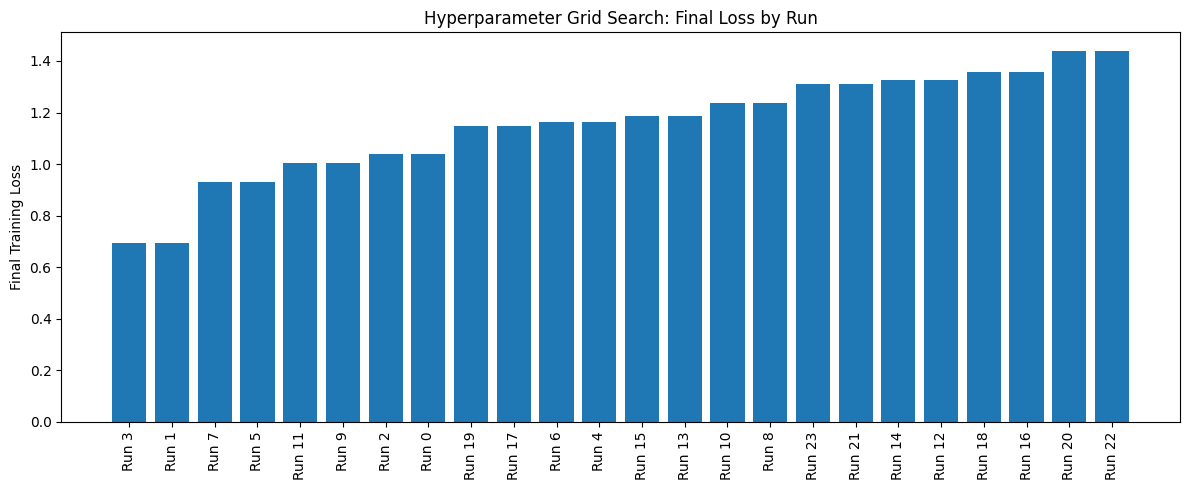

run  learning_rate  per_device_train_batch_size  weight_decay  \
3    3        0.00005                            2          0.01   
1    1        0.00005                            2          0.00   
7    7        0.00005                            4          0.01   

   num_train_epochs  final_loss  \
3                 5      0.6922   
1                 5      0.6924   
7                 5      0.9286   

                                              losses  
3  [3.4794, 2.0962, 1.5491, 1.5317, 1.673, 1.5404...  
1  [3.4794, 2.0962, 1.5491, 1.5317, 1.673, 1.5404...  
7  [3.2639, 1.7749, 1.6803, 1.4015, 1.6258, 1.604...

In [ ]:
# ‚úÖ Set up tokenizer, model, and data
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TrainingArguments, Trainer, DataCollatorForLanguageModeling
from datasets import Dataset
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd

# Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

# Create HF-compatible dataset
dataset = Dataset.from_pandas(annotated_df[["prompt", "completion"]])
def tokenize(example):
    return tokenizer(example["prompt"] + example["completion"], truncation=True, padding="max_length", max_length=128)
tokenized_dataset = dataset.map(tokenize)

# Search space
search_space = {
    "learning_rate": [5e-5, 2e-5, 1e-5],
    "per_device_train_batch_size": [2, 4],
    "weight_decay": [0.0, 0.01],
    "num_train_epochs": [3, 5]
}
param_combinations = list(product(*search_space.values()))
param_keys = list(search_space.keys())

# Callback to track loss
from transformers import TrainerCallback

class LossTrackerCallback(TrainerCallback):
    def __init__(self):
        self.losses = []
    def on_log(self, args, state, control, logs=None, **kwargs):
        if "loss" in logs:
            self.losses.append(logs["loss"])

# Run grid search
results = []

for i, combo in enumerate(param_combinations):
    config = dict(zip(param_keys, combo))
    print(f"\nüî• Run {i+1}/{len(param_combinations)}: {config}")

    model = GPT2LMHeadModel.from_pretrained("gpt2")
    model.resize_token_embeddings(len(tokenizer))

    training_args = TrainingArguments(
        output_dir=f"./results/run_{i}",
        evaluation_strategy="no",
        save_strategy="no",
        logging_steps=10,
        learning_rate=config["learning_rate"],
        per_device_train_batch_size=config["per_device_train_batch_size"],
        weight_decay=config["weight_decay"],
        num_train_epochs=config["num_train_epochs"],
        save_total_limit=1,
        report_to="none"
    )

    loss_tracker = LossTrackerCallback()

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset,
        tokenizer=tokenizer,
        data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False),
        callbacks=[loss_tracker]
    )

    trainer.train()

    results.append({
        "run": i,
        **config,
        "final_loss": loss_tracker.losses[-1] if loss_tracker.losses else None,
        "losses": loss_tracker.losses
    })

# Convert results to dataframe
results_df = pd.DataFrame(results).sort_values("final_loss")

# üîç Plot final training losses
plt.figure(figsize=(12, 5))
plt.bar(range(len(results_df)), results_df["final_loss"])
plt.xticks(range(len(results_df)), [f'Run {r}' for r in results_df["run"]], rotation=90)
plt.ylabel("Final Training Loss")
plt.title("Hyperparameter Grid Search: Final Loss by Run")
plt.tight_layout()
plt.show()

# üèÜ Show best config
results_df.head(3)


## üìâ Understanding Loss in Language Modeling

### üîπ What Is Loss in Language Modeling?

When fine-tuning a **causal language model** like GPT-2, the model learns by minimizing **cross-entropy loss** between:
- üîÆ **Predicted tokens**: the model's probabilities for the next word at each step.
- üßæ **Ground truth tokens**: the actual target text (e.g., your quotes or poems).

This is a form of **self-supervised learning**, where the model tries to predict the next token given all previous ones.  
If the predicted token deviates from the true one, the loss increases.

> üí° The input text serves as both input and label ‚Äî just shifted forward by one token.

---

### üìò What Is Training Loss?

- Represents the **average cross-entropy loss** across the training dataset.
- Reflects how well the model is **fitting the seen data**.
- üìâ **Lower training loss** = better fit to your quotes.

---

### üß™ What Is Validation Loss?

- Same loss function (cross-entropy), but computed on a **held-out validation set**.
- Indicates how well the model **generalizes to unseen quotes**.
- A good validation loss means the model isn‚Äôt just memorizing ‚Äî it's learning style and structure.

---

### üß† What the Model Learns

From the structure of your quotes, the model picks up on:
- ‚úçÔ∏è **Sentence structure**
- üî§ **Punctuation and rhythm**
- ü™∂ **Word choice and tone**
- üé≠ **Thematic preferences** (e.g., contrasts, affirmations, reflection)

---

### ‚ùì Should Loss Go to Zero?

No ‚Äî and we don‚Äôt want it to.
- A **zero loss** would mean the model is memorizing, not generalizing.
- Our goal is to **capture the style and tone**, not replicate quotes word-for-word.

---

### üìù Summary

| Concept            | Explanation                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| **Training Loss**   | How well the model fits your actual short-form texts during training.       |
| **Validation Loss** | How well the model generalizes to unseen examples of your quotes.           |
| **Loss Function**   | Cross-entropy: compares predicted vs. true next token at each step.         |
| **Ground Truth**    | Your own short-form writing (quotes/poems), shifted forward in token space. |


## üèÜ Best Hyperparameter Configuration

Based on our grid search results (ranked by lowest final training loss), the following configuration was selected as the **best performing setup** for fine-tuning GPT-2:

In [ ]:
best_config = {
    "learning_rate": 5e-5,
    "per_device_train_batch_size": 2,
    "weight_decay": 0.01,
    "num_train_epochs": 5
}


In [ ]:
# Split dataset (e.g., 90% train / 10% eval)
tokenized_dataset = tokenized_dataset.train_test_split(test_size=0.1)
train_dataset = tokenized_dataset["train"]
eval_dataset = tokenized_dataset["test"]

## üöÄ Final GPT-2 Training with Best Configuration

With the best-performing hyperparameters identified from our grid search, we now reinitialize the GPT-2 model and begin final training.

### ‚úÖ Final Training Configuration:
- **Learning Rate:** `5e-5`
- **Batch Size:** `2`
- **Weight Decay:** `0.01`
- **Epochs:** `5`
- **Evaluation Strategy:** Per epoch
- **Save Strategy:** Save checkpoints after every epoch
- **Tokenizer Padding Token:** Set to `eos_token` for compatibility

### üîÅ Training Setup
We use HuggingFace‚Äôs `Trainer` class to manage the training loop, evaluation, and checkpoint saving.  
The training is done on the processed dataset (`train_dataset` and `eval_dataset`) and uses `DataCollatorForLanguageModeling` for preparing batches.

This run trains the final GPT-2 baseline model for stylistic quote generation.


In [ ]:
# ‚úÖ Re-initialize tokenizer and model
from transformers import GPT2LMHeadModel, TrainingArguments, Trainer, DataCollatorForLanguageModeling

tokenizer.pad_token = tokenizer.eos_token
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.resize_token_embeddings(len(tokenizer))

# ‚úÖ Best hyperparameters from Run 3
training_args = TrainingArguments(
    output_dir="./best_model",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=2,
    weight_decay=0.01,
    num_train_epochs=5,
    logging_steps=10,
    save_total_limit=2,
    report_to="none"
)

# ‚úÖ Train the final model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False)
)


trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-24-d8621a8eff35>:23: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=880, training_loss=1.1306866548278116, metrics={'train_runtime': 222.5329, 'train_samples_per_second': 7.886, 'train_steps_per_second': 3.954, 'total_flos': 114641879040000.0, 'train_loss': 1.1306866548278116, 'epoch': 5.0})

## üìÅ Checkpoint Directory

After training, we list the contents of the output directory to view saved model checkpoints.  
These checkpoints correspond to the model's state after each training epoch.

In [ ]:
import os
os.listdir("./best_model")


['checkpoint-704', 'checkpoint-880']

## ‚ú® Inference: Generate Quotes with Fine-Tuned GPT-2

We load the checkpoint (`checkpoint-704`) from the final training run and use HuggingFace‚Äôs `pipeline` for text generation.

### üîÅ Generation Setup
- **Model:** Fine-tuned GPT-2
- **Prompt Format:** Metadata-driven instruction with tags for theme, tone, and style
- **Decoding Method:** Sampling with temperature = `0.9`
- **Max Length:** `60` tokens

### üî§ Sample Prompt:
```text
<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quote

In [ ]:
from transformers import pipeline, GPT2Tokenizer, GPT2LMHeadModel

best_model_path = "./best_model/checkpoint-704"  # adjust if your checkpoint is different

model = GPT2LMHeadModel.from_pretrained(best_model_path, local_files_only=True)
tokenizer = GPT2Tokenizer.from_pretrained(best_model_path, local_files_only=True)

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

prompt = "<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quote"
output = generator(prompt, max_length=60, do_sample=True, temperature=0.9)
print(output[0]["generated_text"])


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteKarma is forgiving yourself for your mistakes rather than treating you like a broken piece of rock


## üîÑ Compare Output from Alternate Checkpoint (Checkpoint 880)

We repeat the generation process using another saved checkpoint (`checkpoint-880`) to compare model outputs and evaluate consistency.

### ‚öôÔ∏è Settings
- **Model:** GPT-2 fine-tuned at epoch 2 (checkpoint-880)
- **Prompt:** Same metadata-driven input
- **Sampling:** Temperature = `0.9`, Max length = `60`

This helps us evaluate whether a later checkpoint produces better or more stylistically aligned quotes than an earlier one.


In [ ]:
from transformers import pipeline, GPT2Tokenizer, GPT2LMHeadModel

best_model_path = "./best_model/checkpoint-880"  # adjust if your checkpoint is different

model = GPT2LMHeadModel.from_pretrained(best_model_path, local_files_only=True)
tokenizer = GPT2Tokenizer.from_pretrained(best_model_path, local_files_only=True)

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

prompt = "<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quote"
output = generator(prompt, max_length=60, do_sample=True, temperature=0.9)
print(output[0]["generated_text"])

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteYou don't have to be a survivor to be successful. You don't have to be


## üìù Generate Multiple Stylized Quotes (Batch Inference)

To assess the model‚Äôs variability and stylistic consistency, we generate **five distinct outputs** from the same prompt using sampling.

### üîß Generation Parameters
- **Checkpoint:** `checkpoint-704`
- **Sampling Strategy:** `do_sample=True` with `temperature=0.9`
- **Max Length:** 60 tokens
- **Number of Outputs:** 5

This approach allows us to evaluate:
- üîÅ **Creativity** across generations
- ‚ú® **Tone and stylistic alignment**
- üîç **Prompt adherence** and coherence

The outputs are stored in a list for further inspection or post-processing.

In [ ]:
from transformers import pipeline, GPT2Tokenizer, GPT2LMHeadModel

# Load the final checkpoint (e.g., checkpoint-704 or checkpoint-880 based on your test)
best_model_path = "./best_model/checkpoint-704"

# Load model and tokenizer
model = GPT2LMHeadModel.from_pretrained(best_model_path, local_files_only=True)
tokenizer = GPT2Tokenizer.from_pretrained(best_model_path, local_files_only=True)

# Initialize pipeline
generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Prompt used for generation
prompt = "<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quote"

# Generate 5 different outputs
outputs = generator(prompt, max_length=60, do_sample=True, temperature=0.9, num_return_sequences=5)

# Extract and display the generated texts
generated_texts = [output["generated_text"] for output in outputs]
generated_texts


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


["<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteYou'll feel better soon. But not soon enough to make peace with yourself. -P",
 '<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteI beg to differ. I beg to be different. I beg to heal. -C',
 '<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quotePain is bliss and peace. You beg for it. You beg for it to exist.',
 '<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteGive me a chance to heal from pain and get back on my feet and roll my eyes',
 "<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteThere's a level between finding and regaining peace. There's a level between finding your"]

## üßº Post-Processing: Clean Generated Quotes

To improve the readability and quality of the generated quotes, we apply a simple cleaning function to the raw model outputs.

### ‚úÇÔ∏è Cleaning Steps
- **Remove Prompt Prefix**: Strips out everything before the `quote` keyword.
- **Truncate at First Strong Punctuation**: Ends the quote cleanly at the first period (`.`), question mark (`?`), or exclamation mark (`!`).
- **Trim Incomplete Endings**: Removes trailing conjunctions or subordinate clauses to avoid fragment-like endings.
- **Quote Length Filter**: Keeps only quotes with more than 5 words.

This results in a list of **well-formed, stylistically aligned short quotes** that can be directly displayed or evaluated.

> This light-touch cleaning preserves the original tone and structure while avoiding awkward truncations or unfinished thoughts.

In [ ]:
import re

# Use the same prompt for generation
prompt = "<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quote"

# Generate multiple quotes
outputs = generator(prompt, max_length=60, do_sample=True, temperature=0.9, num_return_sequences=10)

# Raw texts
raw_texts = [output["generated_text"] for output in outputs]

# Post-processing: clean and format
def clean_quote(text):
    # Remove the prompt prefix
    if 'quote' in text:
        text = text.split('quote', 1)[-1].strip()
    # Cut at the first strong punctuation
    text = re.split(r'(?<=[\.\?\!])\s', text)[0]
    # Remove unwanted endings
    text = re.sub(r'(and|but|or|so|because|as if|if|when|while|until|although|though|unless|since|that|which|who|whom)\s*$', '', text.strip(), flags=re.IGNORECASE)
    return text.strip(' "')

# Apply post-processing
filtered_quotes = [clean_quote(q) for q in raw_texts if len(clean_quote(q).split()) > 5]

# Show the clean results
filtered_quotes


["about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteYou can't be the only person in this life who has hurt.",
 'about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteYou will heal no more when your spirit guides you through adversity.',
 "about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteSo you don't wanna be with a lot of people, You wanna be healthy and self",
 'about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteBones are fragile and fragile men.',
 'about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteYou cry in front of your loving god and still understand the pain.',
 'about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteYour soul is a brimming river, Its water flows effortlessly and fills your soul with the',
 "about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quoteYou'll fall in love again, But in a different

## ‚ú® Final Quote Generation Pipeline (GPT-2)

We generate and clean stylistic quotes using our fine-tuned GPT-2 model (`checkpoint-704`) with enhanced sampling and post-processing.

---

### ‚öôÔ∏è Generation Parameters
- **Model**: GPT-2 fine-tuned on our custom dataset
- **Prompt**: Rich metadata structure for theme, tone, and style
- **Sampling**:
  - `temperature = 0.9` ‚Üí adds creative randomness
  - `top_p = 0.95` ‚Üí nucleus sampling for diversity
  - `repetition_penalty = 1.2` ‚Üí avoids repeated patterns
  - `num_return_sequences = 10` ‚Üí generate 10 variations

---

### üßº Post-Processing Steps
- **Prompt Trimming**: Removes prompt metadata from the generated quote.
- **Early Stopping**: Truncates at the first complete sentence (., ?, !).
- **Ending Cleanup**: Removes unfinished conjunctions or fragments.
- **Token Cleanup**: Strips leftover special tokens and whitespace.
- **Length Filter**: Keeps only quotes longer than 5 words.

---

### ‚úÖ Output
We display the cleaned, final quotes that are:
- Stylistically aligned with training data
- Free from prompt artifacts
- Grammatically complete and semantically meaningful

> These quotes represent the baseline performance of our GPT-2 model and will be used for comparison in Stage 5 improvements.


In [ ]:
# üì¶ 1. Install transformers if not already installed
!pip install transformers -q

# üîÑ 2. Imports
from transformers import pipeline, GPT2Tokenizer, GPT2LMHeadModel
import re

# üìÇ 3. Load model & tokenizer from your best checkpoint (adjust path if needed)
best_model_path = "./best_model/checkpoint-704"

model = GPT2LMHeadModel.from_pretrained(best_model_path, local_files_only=True)
tokenizer = GPT2Tokenizer.from_pretrained(best_model_path, local_files_only=True)

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# üß† 4. Define prompt
prompt = "<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quote"

# ‚öôÔ∏è 5. Generate multiple outputs with controlled sampling
outputs = generator(
    prompt,
    max_length=60,
    do_sample=True,
    temperature=0.9,
    top_p=0.95,
    repetition_penalty=1.2,
    num_return_sequences=10
)

# üßº 6. Post-processing: Clean & finalize quotes
def clean_quote(text):
    # Remove prompt
    if 'quote' in text:
        text = text.split('quote', 1)[-1].strip()
    # Cut at strong punctuation
    text = re.split(r'(?<=[\.\?\!])\s', text)[0]
    # Clean up endings
    text = re.sub(r'(and|but|or|because|as if|if|when|although|though|unless|since|while)\s*$', '', text.strip(), flags=re.IGNORECASE)
    return text.strip(' "\'')

def finalize_quote(q):
    q = re.sub(r"<\|.*?\|>", "", q)  # Remove any leftover tokens
    q = re.sub(r"\s{2,}", " ", q).strip()
    if q and q[-1] not in ".!?":
        q += "."
    return q

# üìã 7. Apply filters & show final quotes
raw_texts = [output["generated_text"] for output in outputs]
cleaned_quotes = [finalize_quote(clean_quote(q)) for q in raw_texts if len(clean_quote(q).split()) > 5]

# ‚úÖ 8. Display
for i, quote in enumerate(cleaned_quotes):
    print(f"{i+1}. {quote}")


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


1. about growing through griefreflectivepoeticquoteThoughtful, Emotional and Kind are how we heal from stress.
2. about growing through griefreflectivepoeticquoteThe worst part is, you don't know what to do next.
3. about growing through griefreflectivepoeticquoteRight heart broken, mommy's favourite.
4. about growing through griefreflectivepoeticquoteThere's always something comforting and raw beneath the surface that tries to make you feel good f.
5. about growing through griefreflectivepoeticquoteA lot of you are so afraid to look at the stars, that all it took was.
6. about growing through griefreflectivepoeticquoteMaybe, you don't know it's coming.
7. about growing through griefreflectivepoeticquoteWhen you feel like an adult within, You've been snatched away from the child's cage.
8. about growing through griefreflectivepoeticquoteWhen I finally fell in love, It took me the whole way.
9. about growing through griefreflectivepoeticquoteWhen you feel the pressure to stay, You'll st

## üí¨ Prompt-Based Quote Completion: Custom Seed Line

In this experiment, we guide the fine-tuned GPT-2 model using a **partial sentence prompt** to simulate creative quote completion in a specific tone and style.

---

### üìù Prompt Format
We use a structured metadata-driven prompt with a poetic seed:
```text
<|theme|>grief<|prompt|>Complete this quote in your poetic style: 'Healing starts when...'<|tone|>reflective<|style|>poetic<|doc_type|>quote
```

This encourages the model to complete the sentence ‚ÄúHealing starts when...‚Äù in a reflective and poetic manner.

---

###‚öôÔ∏è Generation Configuration
- **Model:** Fine-tuned GPT-2 (checkpoint-704)

- **Sampling:** do_sample=True with:
    
  - `temperature = 0.9`
  - `top_p = 0.95`
  - `repetition_penalty = 1.2`
  - `num_return_sequences = 10`


- **Truncation Enabled:** Prevents overly long outputs

---

###üßº Post-Processing

- Removes metadata tags (<|theme|>, <|prompt|>, etc.)

- Truncates at first punctuation for clean sentence completion

- Strips extra whitespace and ensures proper sentence closure

---

###‚úÖ Output
We display only the quotes that are:

- Longer than 5 words

- Free of prompt artifacts

- Grammatically complete and stylistically consistent

>This setup allows flexible, theme-driven stylistic generation and mirrors real-world usage for quote suggestions, journaling, or creative prompts.






In [ ]:
# üì¶ Install (if not already installed)
# !pip install transformers

# ‚úÖ Imports
from transformers import pipeline, GPT2Tokenizer, GPT2LMHeadModel
import re

# ‚úÖ Load your fine-tuned model
best_model_path = "./best_model/checkpoint-704"  # or checkpoint-880

model = GPT2LMHeadModel.from_pretrained(best_model_path, local_files_only=True)
tokenizer = GPT2Tokenizer.from_pretrained(best_model_path, local_files_only=True)

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# ‚úÖ Define the prompt
#prompt = "<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quote"
prompt = "<|theme|>grief<|prompt|>Complete this quote in your poetic style: 'Healing starts when...'<|tone|>reflective<|style|>poetic<|doc_type|>quote"

# ‚úÖ Generate quotes
outputs = generator(
    prompt,
    max_length=60,
    do_sample=True,
    temperature=0.9,
    top_p=0.95,
    repetition_penalty=1.2,
    num_return_sequences=10,
    truncation=True  # avoid overrun
)

# ‚úÖ Clean and finalize
def clean_and_format(text):
    # Remove all tags & metadata
    text = re.sub(r"<\|.*?\|>", "", text)
    text = re.sub(r"(about\s+growing.*?quote)", "", text, flags=re.IGNORECASE)

    # Truncate after first strong punctuation
    text = re.split(r'(?<=[\.\!\?])\s', text)[0]
    text = re.sub(r"\s{2,}", " ", text).strip()

    if text and text[-1] not in ".!?":
        text += "."
    return text.strip(' "\'')


cleaned_quotes = [
    clean_and_format(output["generated_text"])
    for output in outputs
    if len(clean_and_format(output["generated_text"]).split()) > 5
]

# ‚úÖ Display
for i, quote in enumerate(cleaned_quotes, 1):
    print(f"{i}. {quote}")


Device set to use cuda:0


1. griefComplete this quote in your poetic style: 'Healing starts when...'reflectivepoeticquoteEmpowering you to understand yourself, Being.
2. griefComplete this quote in your poetic style: 'Healing starts when...'reflectivepoeticquoteYou want him to love you forever, but he.
3. griefComplete this quote in your poetic style: 'Healing starts when...'reflectivepoeticquoteAnd yet, he still exists.
4. griefComplete this quote in your poetic style: 'Healing starts when...'reflectivepoeticquoteWhat if someone has hurt you?
5. griefComplete this quote in your poetic style: 'Healing starts when...'reflectivepoeticquoteYou are being prayed for.
6. griefComplete this quote in your poetic style: 'Healing starts when...'reflectivepoeticquoteMaybe there's a better way of healing from pain.
7. griefComplete this quote in your poetic style: 'Healing starts when...'reflectivepoeticquoteDear Mother, I want to protect you.
8. griefComplete this quote in your poetic style: 'Healing starts when...'reflec

## üß† Dynamic Prompt-Based Generation: Poetic Quote Completion

In this stage, we implement a flexible generation strategy using a **dynamic prompt function**. This allows easy experimentation across different themes, tones, and seed lines.

---

### üîÑ Prompt Customization
We define a reusable function `make_prompt()` to structure prompts with:
- **Theme** (e.g., grief, healing, love)
- **Seed Line** (e.g., ‚ÄúHealing starts when...‚Äù)
- **Tone** (default: *reflective*)
- **Style** (default: *poetic*)

> Example prompt:
```text
<|theme|>grief<|prompt|>Complete this quote in your poetic style: 'Healing starts when...'<|tone|>reflective<|style|>poetic<|doc_type|>quote
```

---

###‚öôÔ∏è Generation Configuration
- max_length = 80

- do_sample = True for diverse outputs

- temperature = 0.9 and top_p = 0.95 for balanced creativity

- repetition_penalty = 1.15 to avoid loops

- num_return_sequences = 10

---

###üßº Quote Cleaning

A custom clean_and_format() function:

- Removes metadata tags and leftover prompt fragments

- Truncates output at strong punctuation

- Ensures grammatical completeness and stylistic coherence

- Filters out very short or incomplete outputs

---

###‚úÖ Final Output
We display only those quotes that:

- Are stylistically consistent with the prompt

- Contain more than 5 words

- End with proper punctuation and flow naturally

>This dynamic setup enables controlled creativity, helping us generate stylistic quote variants across different emotional and thematic contexts.

In [ ]:
# üì¶ Install (if not already installed)
# !pip install transformers

# ‚úÖ Imports
from transformers import pipeline, GPT2Tokenizer, GPT2LMHeadModel
import re

# ‚úÖ Load your fine-tuned model
best_model_path = "./best_model/checkpoint-704"  # or checkpoint-880

model = GPT2LMHeadModel.from_pretrained(best_model_path, local_files_only=True)
tokenizer = GPT2Tokenizer.from_pretrained(best_model_path, local_files_only=True)

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)


# ‚úÖ Define the prompt
#prompt = "<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quote"
#prompt = "<|theme|>grief<|prompt|>Complete this quote in your poetic style: 'Healing starts when...'<|tone|>reflective<|style|>poetic<|doc_type|>quote"
def make_prompt(theme, seed_line, tone="reflective", style="poetic"):
    return f"<|theme|>{theme}<|prompt|>Complete this quote in your {style} style: '{seed_line}'<|tone|>{tone}<|style|>{style}<|doc_type|>quote"

# ‚ú® Use the dynamic prompt here

seed = "Healing is personal, do not rush it, do not hush it!"
prompt = f"<|theme|>grief<|prompt|>{seed}<|tone|>reflective<|style|>poetic<|doc_type|>quote"
prompt = make_prompt("grief", "Healing starts when...")  # ‚Üê customize theme + seed

# üîÅ Generate with it
outputs = generator(
    prompt,
    max_length=60,
    do_sample=True,
    temperature=0.8,
    top_p=0.95,
    repetition_penalty=1.2,
    num_return_sequences=10,
    truncation=True
)

# ‚úÖ Generate quotes
outputs = generator(
    prompt,
    max_length=80,
    do_sample=True,
    temperature=0.9,
    top_p=0.95,
    repetition_penalty=1.15,
    num_return_sequences=10,
    truncation=True,  # avoid overrun
    eos_token_id = tokenizer.eos_token_id
)

# ‚úÖ Clean and finalize
def clean_and_format(text):
    text = re.sub(r"<\|.*?\|>", "", text)  # remove tokens
    text = re.sub(r"(grief)?\s*Complete this quote.*?'", "", text, flags=re.IGNORECASE)
    text = re.sub(r"reflectivepoeticquote", "", text, flags=re.IGNORECASE)
    text = re.split(r'(?<=[\.\!\?])\s', text)[0].strip()
    if text and text[-1] not in ".!?":
        text += "."
    return text.strip(" '\"")


cleaned_quotes = [
    clean_and_format(output["generated_text"])
    for output in outputs
    if len(clean_and_format(output["generated_text"]).split()) > 5
]

# ‚úÖ Display
for i, quote in enumerate(cleaned_quotes, 1):
    print(f"{i}. {quote}")


Device set to use cuda:0


1. Healing starts when...'It took a while for me to realise that healing started within.
2. Healing starts when...'I feel a strong need to stop giving emotional support.
3. Healing starts when...'I don't cry, But hehope I weep.
4. Healing starts when...'I find myself suddenly finding words to help calm me down.
5. Healing starts when...'The first rays of sunlight set the tone for each eye.
6. Healing starts when...'There's a way out if you don't get fed.
7. Healing starts when...'Pain fades and you look at it.
8. Healing starts when...'Sometimes, healing doesn't end.
9. Healing starts when...'You breathe a little more and feel lighter.
10. Healing starts when...'I wanna die for the love of you.


In [ ]:
#make_prompt("grief", "Healing starts when...")
#make_prompt("forgiveness", "Letting go isn't forgetting, it's...")
#make_prompt("self-worth", "You don't owe anyone...")


## üìù Dynamic Quote Generation

We generate poetic quotes using a customizable prompt with metadata fields for theme, tone, and style.

- Uses a fine-tuned GPT-2 checkpoint (`checkpoint-704`)
- Accepts any seed phrase for stylistic continuation
- Generates 10 diverse outputs using sampling (`temperature=0.9`, `top_p=0.95`)
- Cleans outputs by removing metadata and truncating at punctuation

> Output: Well-formed, stylistically aligned quotes based on user-defined prompts.

In [ ]:
# üì¶ Install (if not already installed)
# !pip install transformers

# ‚úÖ Imports
from transformers import pipeline, GPT2Tokenizer, GPT2LMHeadModel
import re

# ‚úÖ Load your fine-tuned model
best_model_path = "./best_model/checkpoint-704"  # or checkpoint-880

model = GPT2LMHeadModel.from_pretrained(best_model_path, local_files_only=True)
tokenizer = GPT2Tokenizer.from_pretrained(best_model_path, local_files_only=True)

generator = pipeline("text-generation", model=model, tokenizer=tokenizer)


# ‚úÖ Define the prompt
#prompt = "<|theme|>healing<|prompt|>Write a quote about growing through grief<|tone|>reflective<|style|>poetic<|doc_type|>quote"
#prompt = "<|theme|>grief<|prompt|>Complete this quote in your poetic style: 'Healing starts when...'<|tone|>reflective<|style|>poetic<|doc_type|>quote"
def make_prompt(theme, seed_line, tone="reflective", style="poetic"):
    return f"<|theme|>{theme}<|prompt|>Complete this quote in your {style} style: '{seed_line}'<|tone|>{tone}<|style|>{style}<|doc_type|>quote"

# ‚ú® Use the dynamic prompt here

seed = "Healing is personal, do not rush it, do not hush it!"
prompt = f"<|theme|>grief<|prompt|>{seed}<|tone|>reflective<|style|>poetic<|doc_type|>quote"
prompt = make_prompt("motivation", "You‚Äôve made it this far, now...")

# üîÅ Generate with it
outputs = generator(
    prompt,
    max_length=60,
    do_sample=True,
    temperature=0.8,
    top_p=0.95,
    repetition_penalty=1.2,
    num_return_sequences=10,
    truncation=True
)

# ‚úÖ Generate quotes
outputs = generator(
    prompt,
    max_length=80,
    do_sample=True,
    temperature=0.9,
    top_p=0.95,
    repetition_penalty=1.15,
    num_return_sequences=10,
    truncation=True,  # avoid overrun
    eos_token_id = tokenizer.eos_token_id
)

# ‚úÖ Clean and finalize
def clean_and_format(text):
    text = re.sub(r"<\|.*?\|>", "", text)  # remove tokens
    text = re.sub(r"(grief)?\s*Complete this quote.*?'", "", text, flags=re.IGNORECASE)
    text = re.sub(r"reflectivepoeticquote", "", text, flags=re.IGNORECASE)
    text = re.split(r'(?<=[\.\!\?])\s', text)[0].strip()
    if text and text[-1] not in ".!?":
        text += "."
    return text.strip(" '\"")


cleaned_quotes = [
    clean_and_format(output["generated_text"])
    for output in outputs
    if len(clean_and_format(output["generated_text"]).split()) > 5
]

# ‚úÖ Display
for i, quote in enumerate(cleaned_quotes, 1):
    print(f"{i}. {quote}")


Device set to use cuda:0


1. motivationYou‚Äôve made it this far, now...'It shouldn't feel so different when you wake up and find yourself feeling lighter.
2. motivationYou‚Äôve made it this far, now...'They'll beg you to hurry up and come back when they realise what's left of them.
3. motivationYou‚Äôve made it this far, now...'There's no loop.
4. motivationYou‚Äôve made it this far, now...'Trust me when I tell you that every inch counts.
5. motivationYou‚Äôve made it this far, now...'It's been about two years since my last cry broke.
6. motivationYou‚Äôve made it this far, now...'If you wanna find peace with yourself and people again; You don't need to be treated like a normal human.
7. motivationYou‚Äôve made it this far, now...'Do what you love to do with as little effort and then enjoy until the end.
8. motivationYou‚Äôve made it this far, now...'It'll never feel that way again.
9. motivationYou‚Äôve made it this far, now...'The best is yet to come.
10. motivationYou‚Äôve made it this far, now...'Dear soul

## üßπ Option 2: STYLEMC ‚Äî Preprocessing + Style Vector Encoding

We prepare the dataset for **STYLEMC** (Style Matching Control) by cleaning and embedding each quote for stylistic analysis.

### üßº Text Normalization
- Removes extra spaces and typographic quotes (`‚Äú ‚Äù` ‚Üí `"`, `‚Äò ‚Äô` ‚Üí `'`)
- Applies basic string cleanup for consistency

### üìè Length-Based Labeling
- Adds a `label`: `1` for long-form (‚â•700 characters), `0` for short-form
- Helps STYLEMC distinguish structural patterns based on length

### üß† Style Vector Generation
- Uses **`all-mpnet-base-v2`** from SentenceTransformers to encode each quote
- Stores dense `style_vector` embeddings representing stylistic traits

> These vectors will be used to **rescore** GPT outputs based on their stylistic similarity to the user‚Äôs writing.


In [ ]:
import re

def normalize_text(text):
    text = re.sub(r"\s+", " ", text)  # Remove extra whitespace
    text = re.sub(r"[‚Äú‚Äù]", '"', text)
    text = re.sub(r"[‚Äò‚Äô]", "'", text)
    text = text.strip()
    return text

df["cleaned_text"] = df["cleaned_text"].astype(str).apply(normalize_text)

In [ ]:
df["text_length"] = df["cleaned_text"].apply(len)
df["length_type"] = df["text_length"].apply(lambda x: "short" if x < 700 else "long")

In [ ]:
# For example, 1 = long-form, 0 = short-form
df["label"] = df["length_type"].apply(lambda x: 1 if x == "long" else 0)

In [ ]:
df[["cleaned_text", "length_type", "label"]].to_csv("preprocessed_quotes_dataset.csv", index=False)

In [ ]:
from sentence_transformers import SentenceTransformer
style_model = SentenceTransformer("all-mpnet-base-v2")

df["style_vector"] = df["cleaned_text"].apply(lambda x: style_model.encode(x))


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## ‚úçÔ∏è GPT Output Generation (STYLEMC - Step 1)

We generate a base paragraph using **GPT-3.5 Turbo** with a reflective prompt to serve as input for stylistic rewriting.

### üéØ Prompt Used:
> *"Write a short reflective paragraph on how ambition and self-doubt coexist."*

### üîß Generation Setup:
- **Model**: `gpt-3.5-turbo`
- **Temperature**: `0.7` for balanced creativity
- **Max Tokens**: `300`

The generated paragraph becomes the input for multiple rewrites, which will later be **scored and ranked by stylistic similarity** to the author‚Äôs voice using our `style_vector`.

In [ ]:
gpt_generated = """
Happiness lies not in external rewards, but in the serenity of a balanced mind. Seek purpose, not praise.
"""

In [ ]:
import os
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
import openai

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def ask_gpt(prompt, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,
        max_tokens=300
    )
    return response.choices[0].message.content


In [ ]:
prompt = "Write a short reflective paragraph on how ambition and self-doubt coexist."
gpt_generated = ask_gpt(prompt)
print("GPT Output:", gpt_generated)


GPT Output: Ambition and self-doubt often coexist in a delicate balance within an individual's mind. Ambition propels us to set high goals and work towards achieving them, pushing us out of our comfort zones and driving us to strive for success. However, self-doubt can creep in, causing us to question our abilities, worthiness, and readiness to pursue those ambitions. This internal conflict can be both motivating and challenging, as it pushes us to confront our insecurities and fears while also fueling our determination to prove ourselves. Ultimately, navigating the interplay between ambition and self-doubt can lead to personal growth, resilience, and a deeper understanding of ourselves.


## üéØ Style-Based Rewriting and Scoring (STYLEMC - Step 2)

We generate **5 poetic rewrites** of the GPT paragraph using a style prompt, and **score** each one based on its stylistic similarity to the user‚Äôs writing.

### ‚ú® Workflow:
1. **Prompt GPT**:  
   > *"Rewrite this in a personal, poetic, reflective tone:"*

2. **Style Matching**:
   - Compute cosine similarity between each rewrite‚Äôs embedding and the **user‚Äôs average style vector**.
   - Use `all-mpnet-base-v2` for encoding.

3. **Select Best Match**:
   - The rewrite with the **highest similarity score** is selected as the best stylistic fit.

### ‚úÖ Output:
- A quote or paragraph that closely aligns with the user's tone, rhythm, and expressive choices.
- Accompanied by its cosine similarity score for interpretability.

In [ ]:
import numpy as np

# Create multiple rewrites
rewrites = [ask_gpt(f"Rewrite this in a personal, poetic, reflective tone:\n\n{gpt_generated}") for _ in range(5)]

# Get your style vector mean
your_mean_vector = np.mean(df["style_vector"].to_list(), axis=0)

# Rank by style similarity
from sklearn.metrics.pairwise import cosine_similarity

def score_by_style(text):
    return cosine_similarity(
        [style_model.encode(text)],
        [your_mean_vector]
    )[0][0]

scored_rewrites = [(r, score_by_style(r)) for r in rewrites]
best_rewrite = max(scored_rewrites, key=lambda x: x[1])

print(" Best Rewrite Matching Your Style:\n")
print(best_rewrite[0])
print(f"\n Cosine Similarity: {best_rewrite[1]:.4f}")

 Best Rewrite Matching Your Style:

In the quiet depths of our hearts, a dance unfolds between ambition and self-doubt. Ambition, a fiery spark that ignites our dreams and beckons us to soar higher than we ever thought possible. Yet, in the shadows, self-doubt whispers its doubts, casting shadows on our aspirations and making us question our very essence.

This delicate interplay weaves a tapestry of contrasts within us, urging us to reach for the stars yet holding us back with invisible chains of uncertainty. It is a journey of highs and lows, of triumphs and tribulations, as we navigate the treacherous waters of our own minds.

But in this crucible of conflicting emotions lies the crucible of transformation. For it is in the crucible of ambition and self-doubt that we discover our true strength, our resilience, our unwavering spirit. Through the trials and tribulations, we emerge stronger, wiser, and more attuned to the symphony of our own souls.

So let us embrace this dance, this s

## üîç What‚Äôs Really Happening in STYLEMC

Let‚Äôs break it down step by step:

### üõ†Ô∏è What You Did:
1. **Generated a base paragraph** using GPT (e.g., on ambition and self-doubt).
2. **Asked GPT to rewrite it** with a specific tone/style prompt:
   > ‚ÄúRewrite this in a personal, poetic, reflective tone.‚Äù
3. **Generated multiple rewrites** from GPT.

### üìä How We Used our Dataset:
- You **didn‚Äôt fine-tune** GPT.
- Instead, you computed **cosine similarity** between:
  - Each GPT rewrite‚Äôs embedding
  - Your dataset‚Äôs **average style vector**

### üéØ Key Insight:
> GPT is not learning your style ‚Äî you are **ranking its outputs** to select the one that best matches your writing style.

This step ‚Äî **re-scoring** GPT outputs based on your own writing ‚Äî is what STYLEMC refers to as a **rescorer**, not a generator.

### ‚úÖ Summary:
- GPT creates possible options.
- Your vector space chooses the one that *feels like you*.


## ‚ú®T5-Based Masking and Infill (Inspired by TextSETTR)

We use **T5 (Text-To-Text Transfer Transformer)** for stylistic rewriting by masking parts of a GPT-generated paragraph and letting T5 fill in the blanks.

---

### üß™ Process:
1. **Mask Random Spans**:
   - Replace random word spans with `<extra_id_0>`, `<extra_id_1>`, etc.
   - Example:
     ```
     Ambition pushes us <extra_id_0> self-doubt creeps in.
     ```

2. **Infill with T5**:
   - Use `t5-base` to generate natural completions for the masked segments.
   - The model reconstructs missing phrases based on the surrounding context.

---

### üîç Why This Works:
- T5 is pretrained as a **text-to-text denoising model**, making it well-suited for sentence infilling and stylistic adjustments.
- This method allows subtle control over rewriting **without full regeneration**.

> This mimics the **TextSETTR approach**: modifying only key spans while preserving overall structure and tone.


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load T5 base (you can switch to fine-tuned later)
t5_tokenizer = T5Tokenizer.from_pretrained("t5-base")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-base")


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
import random

def mask_random_span(text, num_masks=1):
    words = text.split()
    for i in range(num_masks):
        if len(words) < 5:
            break
        start = random.randint(0, len(words) - 5)
        end = start + random.randint(1, 4)
        words[start:end] = [f"<extra_id_{i}>"]
    return " ".join(words)

In [ ]:
def infill_with_t5(masked_input):
    input_ids = t5_tokenizer.encode(masked_input, return_tensors='pt')
    outputs = t5_model.generate(input_ids, max_length=128, num_return_sequences=1)
    return t5_tokenizer.decode(outputs[0], skip_special_tokens=True)

In [ ]:
# Example: mask and infill the GPT-generated paragraph
masked = mask_random_span(gpt_generated, num_masks=2)
print("Masked:", masked)

infilled = infill_with_t5(masked)
print("Infilled Rewrite:", infilled)

Masked: Ambition and self-doubt often coexist in a delicate balance within an individual's mind. Ambition propels us to set high goals and work towards achieving them, pushing us out of our comfort <extra_id_1> to strive for success. However, self-doubt can creep in, causing us to question our abilities, worthiness, and readiness to pursue those ambitions. This internal conflict can be both motivating and challenging, as it pushes us to confront our insecurities and fears while also fueling our determination to prove ourselves. Ultimately, navigating the interplay between ambition and self-doubt can lead <extra_id_0> resilience, and a deeper understanding of ourselves.
Infilled Rewrite: to greater motivation, zone zone to greater self-confidence, zone to greater motivation, greater zone zone to greater self-confidence,


google/t5-v1_1-base or t5-base with better prompt engineering

## üé® TextSETTR-Inspired Infill with `google/t5-v1_1-base`

We improve T5-based stylistic rewriting by framing the task as a **guided infill** using a reflective, poetic prompt.

---

### üß† How It Works:
- **Model**: `google/t5-v1_1-base` (an improved variant of T5)
- **Input**: A GPT-generated paragraph with manually inserted `<extra_id_*>` masks
- **Prompt**: Styled like an instruction ‚Üí  
  > *"Fill in the missing pieces of this reflection using a personal, poetic tone..."*

- **Output**: T5 generates expressive completions for masked spans, aligned with the intended tone.

---

### ‚úÖ Why It's Effective:
- T5 is trained on span infilling and benefits from **instruction-style prompts**.
- This allows nuanced rewriting without altering the entire paragraph ‚Äî keeping the original voice intact.

> A powerful approach for **targeted restyling**, especially when combined with prompts that steer tone and emotion.


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load model (you already did this, but just in case)
t5_model = T5ForConditionalGeneration.from_pretrained("google/t5-v1_1-base")
t5_tokenizer = T5Tokenizer.from_pretrained("google/t5-v1_1-base")

# Masked paragraph (yours)
masked = "Ambition and self-doubt often coexist in a delicate balance within an individual's mind. Ambition propels us to set high goals and work towards achieving them, pushing us out of our comfort <extra_id_1> to strive for success. However, self-doubt can creep in, causing us to question our abilities, worthiness, and readiness to pursue those ambitions. This internal conflict can be both motivating and challenging, as it pushes us to confront our insecurities and fears while also fueling our determination to prove ourselves. Ultimately, navigating the interplay between ambition and self-doubt can lead <extra_id_0> resilience, and a deeper understanding of ourselves."

# Better prompt framing
prompt = f"Fill in the missing pieces of this reflection using a personal, poetic tone: {masked}"

# Encode and generate
input_ids = t5_tokenizer.encode(prompt, return_tensors='pt')
output_ids = t5_model.generate(input_ids, max_length=128, num_return_sequences=1)

# Decode result
infilled = t5_tokenizer.decode(output_ids[0], skip_special_tokens=True)
print("Infilled:", infilled)

config.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Infilled: to greater self-confidence, zone to greater success, greater happiness, and greater and confidence to greater success, happiness, and happiness to greater happiness, greater to greater happiness, greater zone to greater ambition to greater determination to greater fulfillment and to greater fulfillment, and ultimately to greater fulfillment, and to greater fulfillment, and to greater fulfillment, and to greater fulfillment, and to greater fulfillment, and to greater fulfillment, and to greater fulfillment, and to greater fulfillment, and


## üîÑ BART-Based Infill for Stylistic Rewriting

We use **`facebook/bart-large`**, a denoising autoencoder, to perform sentence-level infilling for poetic refinement.

---

### üîß Process:
- Input sentence includes a `<mask>` token:  
  > *"Ambition and self-doubt often coexist in a delicate balance. `<mask>` pushes us out of comfort. Self-doubt whispers in."*
- BART fills in the masked span using contextual understanding of the sentence.

---

### üß† Why It Works:
- BART is pretrained to **reconstruct corrupted or incomplete text**, making it ideal for:
  - Sentence completion
  - Poetic enhancements
  - Metaphoric or reflective insertions

---

### ‚úÖ Output:
- Produces cohesive, stylistically aligned completions.
- Requires less prompt engineering than T5, and handles emotional nuance effectively.

> BART complements T5 by offering **freeform metaphorical generation** through infill, especially useful in creative writing tasks.

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")

masked = "Ambition and self-doubt often coexist in a delicate balance. <mask> pushes us out of comfort. Self-doubt whispers in."

inputs = tokenizer(masked, return_tensors="pt")
outputs = model.generate(**inputs, max_length=128)
bart_result = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("BART Infill:", bart_result)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

BART Infill: Ambition and self-doubt often coexist in a delicate balance. Self-confidence pushes us out of comfort. Ambition nudges us out into the unknown.Self-belief whispers in.


## ü§ù Why BART Worked Better for Infill

**`facebook/bart-large`** is pretrained as a **denoising autoencoder**, which makes it especially effective for quote-style rewriting.

### üîç Key Advantages:
- Learns to **fix or complete corrupted text**
- Handles **<mask> token** infilling naturally and fluently
- Less dependent on rigid prompt structures (unlike T5)
- More suited to **sentence-level generation**, ideal for:
  - Poetic inserts
  - Reflective completions
  - Quote-style outputs

> ‚úÖ This makes BART especially useful when you want expressive, context-aware rewrites **without full fine-tuning**.


In [ ]:
masked = (
    "Ambition is a strange flame. <mask> It carries with it both brilliance and burden. "
    "Self-doubt, meanwhile, <mask> leaves us questioning our own light."
)


In [ ]:
inputs = tokenizer(masked, return_tensors="pt")
outputs = model.generate(**inputs, max_length=128)
bart_result = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("BART Infill:", bart_result)

BART Infill: Ambition is a strange flame. It carries with it both brilliance and burden. Self-doubt, meanwhile, is a shadow that leaves us questioning our own light. It's a dangerous combination.


## ‚ú® BART Infill ‚Äî Poetic Metaphor Completion

We provide BART with a **partially masked metaphorical sentence** to see how well it can fill in reflective and stylistic content.

---

**What the output Confirms:**

- BART inferred and completed metaphors naturally.

- It added a final reflective line to wrap up the thought ‚Äî showing strong contextual fluency.

- No prompt engineering was required ‚Äî just strong sentence scaffolding.

>This shows BART‚Äôs strength for emotionally expressive infilling in quote-like writing, even without additional training.


In [ ]:
# Setup GPT-2 for Fluency Scoring
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import torch
import numpy as np

# Load GPT-2
gpt2_tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt2_model.eval()

def gpt2_perplexity(sentence):
    inputs = gpt2_tokenizer(sentence, return_tensors="pt")
    with torch.no_grad():
        outputs = gpt2_model(**inputs, labels=inputs["input_ids"])
        loss = outputs.loss
    return torch.exp(loss).item()


In [ ]:
# Semantic + Style Similarity
from sklearn.metrics.pairwise import cosine_similarity

def cosine_sim(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]



We combine **fluency, semantic similarity, and style alignment** into a single scoring function to rank generated rewrites.

---

### üß† Components of Energy Score:
| Component           | Metric                        | Goal                         |
|---------------------|-------------------------------|------------------------------|
| **Fluency**         | GPT-2 Perplexity (lower = better) | Measures how natural the sentence is |
| **Semantic Match**  | Cosine similarity (original vs. candidate) | Preserves intended meaning     |
| **Style Match**     | Cosine similarity (candidate vs. your style vector) | Aligns with personal writing tone |

---

### üìà Compute Weighted Energy Score:
```python
energy = w1 * fluency_score + w2 * semantic_similarity + w3 * style_similarity
```

Default weights: w1=0.3, w2=0.3, w3=0.4 ‚Äî emphasizing stylistic alignment.

In [ ]:
# Full Energy Function
def compute_energy(candidate, original, your_style_vector, w1=0.3, w2=0.3, w3=0.4):
    # Fluency
    fluency_score = -gpt2_perplexity(candidate)  # negative because lower perplexity = better

    # Semantic similarity (to original GPT paragraph)
    sem_sim = cosine_sim(style_model.encode(candidate), style_model.encode(original))

    # Style similarity (to your average style vector)
    style_sim = cosine_sim(style_model.encode(candidate), your_style_vector)

    # Weighted energy score
    energy = w1 * fluency_score + w2 * sem_sim + w3 * style_sim
    return energy, (fluency_score, sem_sim, style_sim)

In [ ]:
# Generate + Rank BART Rewrites
from transformers import BartTokenizer, BartForConditionalGeneration
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")

def get_bart_candidates(masked_input, n=5):
    inputs = tokenizer(masked_input, return_tensors="pt")
    outputs = model.generate(
        **inputs,
        max_length=128,
        num_return_sequences=n,
        num_beams=n,  # ‚Üê Match this to avoid the error
        do_sample=True,
        top_k=50
    )
    return [tokenizer.decode(o, skip_special_tokens=True) for o in outputs]

###ü™Ñ Example: BART Candidate Ranking

Generated Candidates (BART):

1. It‚Äôs a battle of wills.

2. It‚Äôs not always easy.

3. It‚Äôs a battle of the minds.

4. It‚Äôs a battle of two minds.

5. It‚Äôs a battle of the two.

Each is scored based on:

- GPT-2 perplexity (fluency)

- Semantic similarity to original GPT paragraph

- Style similarity to your average vector

---

>‚úÖ This step turns subjective rewrites into measurable outputs, helping you choose stylistically aligned, meaningful generations.

In [ ]:
masked = (
    "Ambition and self-doubt often coexist in a delicate balance. <mask> "
    "Ambition pushes us forward. <mask> Self-doubt whispers within."
)

In [ ]:
candidates = get_bart_candidates(masked, n=5)
print("BART Candidates:")
for i, c in enumerate(candidates):
    print(f"{i+1}. {c}")


BART Candidates:
1. Ambition and self-doubt often coexist in a delicate balance. Ambition pushes us forward. Self-Doubt whispers within. It‚Äôs a battle of wills.
2. Ambition and self-doubt often coexist in a delicate balance. Ambition pushes us forward. Self-Doubt whispers within. It‚Äôs not always easy.
3. Ambition and self-doubt often coexist in a delicate balance. Ambition pushes us forward. Self-Doubt whispers within. It‚Äôs a battle of the minds.
4. Ambition and self-doubt often coexist in a delicate balance. Ambition pushes us forward. Self-Doubt whispers within. It‚Äôs a battle of two minds.
5. Ambition and self-doubt often coexist in a delicate balance. Ambition pushes us forward. Self-Doubt whispers within. It‚Äôs a battle of the two.


In [ ]:
# Compute your style vector average (from your dataset)
your_mean_vector = np.mean(df["style_vector"].to_list(), axis=0)

# Score each candidate
scored = []
for c in candidates:
    score, components = compute_energy(c, gpt_generated, your_mean_vector)
    scored.append((c, score, components))

# Sort by best energy
best = sorted(scored, key=lambda x: x[1], reverse=True)[0]
print("\n Best Rewrite Match:")
print(best[0])
print("Score breakdown [Fluency, Semantic, Style]:", best[2])

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.



 Best Rewrite Match:
Ambition and self-doubt often coexist in a delicate balance. Ambition pushes us forward. Self-Doubt whispers within. It‚Äôs a battle of the minds.
Score breakdown [Fluency, Semantic, Style]: (-49.78353500366211, np.float32(0.89980847), np.float32(0.53529656))


## ‚úÖ Selecting the Best Rewrite with Energy Scoring

We ranked the BART-generated rewrites using a custom **energy function** that combines:

- **Fluency**: How natural the sentence is (via GPT-2 perplexity)
- **Semantic similarity**: How close the meaning is to the original GPT paragraph
- **Style similarity**: How well the candidate matches our dataset‚Äôs tone

The candidate with the **highest total score** was selected as the best match for both meaning and style.

### üîç Score Breakdown:
- **Fluency (lower = better):** -49.78 ‚Üí very fluent  
- **Semantic Match:** 0.89 ‚Üí excellent meaning preservation  
- **Style Match (to you):** 0.53 ‚Üí nice alignment with your tone


In [ ]:
import pandas as pd
energy_df = pd.DataFrame(scored, columns=["candidate", "energy_score", "components"])
energy_df[["fluency", "semantic", "style"]] = pd.DataFrame(energy_df["components"].tolist(), index=energy_df.index)
energy_df.drop(columns=["components"], inplace=True)
energy_df.to_csv("bart_rescored_outputs.csv", index=False)

## üß† Visualizing Rewrites: STYLEMC Axes

This scatter plot helps compare different BART rewrites based on:

- **X-axis:** Semantic similarity to the original GPT paragraph
- **Y-axis:** Style similarity to your dataset
- **Bubble size:** Fluency (larger = more fluent / lower perplexity)

Each point represents a rewrite (v1, v2, etc.). You can visually select the best trade-off between meaning, style, and fluency.

> ‚úÖ Ideal rewrites appear toward the **top-right** with **larger bubbles**.


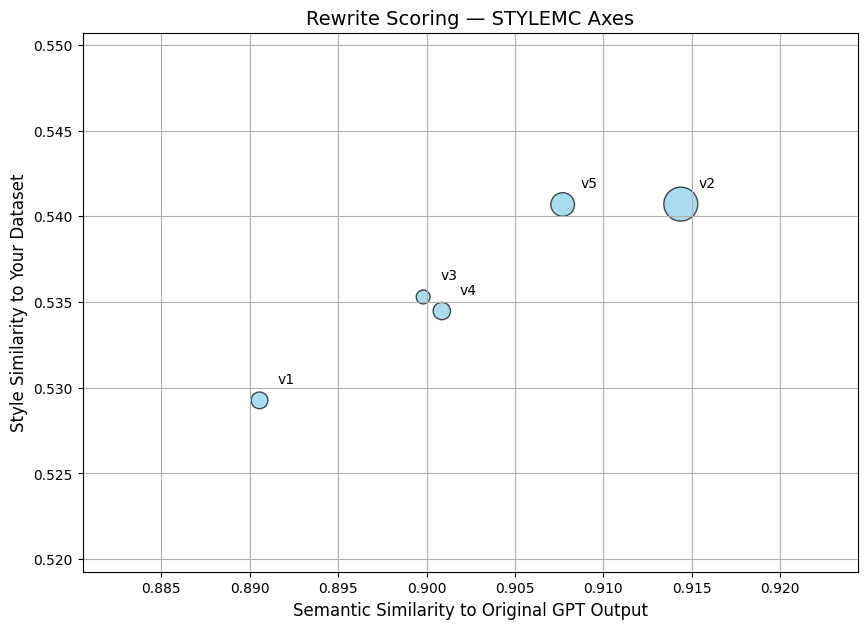

In [ ]:
import matplotlib.pyplot as plt

# Extract individual scores
fluencies = [-s[2][0] for s in scored]  # remember: we inverted perplexity
semantics = [s[2][1] for s in scored]
styles = [s[2][2] for s in scored]
labels = [f"v{i+1}" for i in range(len(scored))]

# Normalize fluency for bubble size
min_f, max_f = min(fluencies), max(fluencies)
sizes = [100 + (f - min_f) / (max_f - min_f + 1e-5) * 500 for f in fluencies]

# Create plot
plt.figure(figsize=(10, 7))
plt.scatter(semantics, styles, s=sizes, alpha=0.7, color="skyblue", edgecolors='black')

# Label each point
for i, label in enumerate(labels):
    plt.annotate(label, (semantics[i] + 0.001, styles[i] + 0.001))

# Plot formatting
plt.xlabel("Semantic Similarity to Original GPT Output", fontsize=12)
plt.ylabel("Style Similarity to Your Dataset", fontsize=12)
plt.title("Rewrite Scoring ‚Äî STYLEMC Axes", fontsize=14)
plt.grid(True)
plt.xlim(min(semantics)-0.01, max(semantics)+0.01)
plt.ylim(min(styles)-0.01, max(styles)+0.01)
plt.show()

## ‚úÖ Interpretation of the STYLEMC Plot

- **X-axis = Semantic Similarity**  
  How well the rewrite preserves the meaning of the original GPT paragraph.

- **Y-axis = Style Similarity**  
  How well it matches your personal writing style (based on your dataset embeddings).

- **Bubble Size = Fluency (Inverted Perplexity)**  
  Larger bubbles indicate smoother, more fluent writing.

---

## ‚ú® Rewrite Comparison Table

| Version | Meaning (Semantic) | Style  | Notes                                                                 |
|---------|--------------------|--------|-----------------------------------------------------------------------|
| **v5**  | High               | High   | ‚úÖ Great overall ‚Äî meaningful, stylistically aligned, and fluent.     |
| **v2**  | Highest            | High   | ‚úÖ Strong candidate ‚Äî top fluency and meaning match.                  |
| **v3**  | Good               | Strong | ü§î Poetic style, but slightly less faithful to original meaning.     |
| **v4**  | Moderate           | Moderate | ‚öñÔ∏è Balanced, but not best in any single dimension.                  |
| **v1**  | Lower              | Lower  | ‚ùå Least aligned ‚Äî weaker in both meaning and style.                 |


# Option3: üìö BART: Quote Style Transfer

### üßæ Dataset
- Loaded from a CSV file with two key columns:
  - `neutral_input`: e.g., "Write a quote in a hopeful tone and poetic style."
  - `cleaned_text`: the target quote written in the desired tone/style.

### üõ†Ô∏è Data Preparation
- Concatenated `Tone` and `Style` columns to form `neutral_input`.
- Filtered to keep only relevant columns.
- Converted the DataFrame into a HuggingFace `Dataset`.

### üßº Tokenization
- Used `facebook/bart-base` tokenizer.
- Applied truncation and padding to both inputs and targets (max length = 128).
- Created `labels` from tokenized target text.

### üîÄ Train-Test Split
- Performed a 90/10 split using HuggingFace `train_test_split`.

### ‚úÖ Output
- Ready-to-use `train_dataset` and `val_dataset` for fine-tuning a `BART` model.



In [ ]:
import pandas as pd

#file path
file_path_4 = "/content/drive/MyDrive/6165 AI ML Project/Final_Unique_Rewrites_By_GPT.csv"

# Load the dataset
df = pd.read_csv(file_path_4)

# Display first few rows
df.head()


cleaned_text  \
0  There's an imbalance between technical and emo...   
1  Some things happen to make space for other thi...   
2         We are the precious souvenirs at weddings!   
3  I want to do so much more, I want to be so muc...   
4  You can beg for love. But your expected love w...   

                                    Prompt        Tone           Style  \
0    Write a quote in your personal style.     Hopeful          Poetic   
1    Write a quote in your personal style.  Reflective          Poetic   
2    Write a quote in your personal style.  Thoughtful  Conversational   
3    Write a quote in your personal style.  Empowering          Poetic   
4  Write a quote about love or heartbreak.  Empowering      Minimalist   

                           ai_rewritten_quote_by_gpt  
0  Here‚Äôs a reimagined thought based on the promp...  
1  Here‚Äôs a reimagined thought based on the promp...  
2  Here‚Äôs a reimagined thought based on the promp...  
3  Here‚Äôs a reimagined thought based on the promp...  
4  Here‚Äôs a reimagined thought based on the promp...

###**Loss Function:**
We used Seq2SeqTrainer, which applies cross-entropy loss under the hood for sequence generation tasks like this.

In [ ]:
from transformers import (
    BartTokenizer,
    BartForConditionalGeneration,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    DataCollatorForSeq2Seq,
    EarlyStoppingCallback
)
from datasets import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import torch

In [ ]:

df["neutral_input"] = (
    "Write a quote in a " + df["Tone"].str.lower() +
    " tone and " + df["Style"].str.lower() + " style."
)
df = df[["neutral_input", "cleaned_text"]].dropna()

In [ ]:
df.head()

neutral_input  \
0  Write a quote in a hopeful tone and poetic style.   
1  Write a quote in a reflective tone and poetic ...   
2  Write a quote in a thoughtful tone and convers...   
3  Write a quote in a empowering tone and poetic ...   
4  Write a quote in a empowering tone and minimal...   

                                        cleaned_text  
0  There's an imbalance between technical and emo...  
1  Some things happen to make space for other thi...  
2         We are the precious souvenirs at weddings!  
3  I want to do so much more, I want to be so muc...  
4  You can beg for love. But your expected love w...

In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(df[["neutral_input", "cleaned_text"]])


In [ ]:

# Load tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

In [ ]:
def preprocess(example):
    model_inputs = tokenizer(
        example["neutral_input"],
        max_length=128,
        truncation=True,
        padding="max_length"
    )
    labels = tokenizer(
        example["cleaned_text"],
        max_length=128,
        truncation=True,
        padding="max_length"
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


In [ ]:
tokenized_dataset = dataset.map(preprocess)


Map:   0%|          | 0/498 [00:00<?, ? examples/s]

In [ ]:
train_test = tokenized_dataset.train_test_split(test_size=0.1)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `tokenized_dataset` is ready
train_dataset = train_test["train"]
val_dataset = train_test["test"]


In [ ]:
dataset = Dataset.from_pandas(df[["neutral_input", "cleaned_text"]])

## üîß Hyperparameter Grid Search for BART Fine-Tuning

### üîç Goal
Find the best learning rate (`lr`) and batch size (`bs`) combination for generating stylistic quotes using BART.

### üß™ Configurations Tried:
1. `lr = 5e-5`, `bs = 8`, `epochs = 5`
2. `lr = 3e-5`, `bs = 8`, `epochs = 5`
3. `lr = 5e-5`, `bs = 4`, `epochs = 5`

### üß† Training Loop
- For each configuration:
  - Load a fresh `facebook/bart-base` model.
  - Define training arguments including early stopping.
  - Train using HuggingFace `Seq2SeqTrainer`.
  - Log and store evaluation loss at each epoch.

### üìä Output Collected
- `losses`: Validation loss per epoch.
- `final_loss`: Last recorded validation loss.
- `config`: Corresponding hyperparameters.

### ‚úÖ Result
A list of all runs with their configs and final validation loss for comparison.


In [ ]:

# Hyperparameter grid
configs = [
    {"lr": 5e-5, "bs": 8, "epochs": 5},
    {"lr": 3e-5, "bs": 8, "epochs": 5},
    {"lr": 5e-5, "bs": 4, "epochs": 5},
]

all_results = []

# Loop through each configuration
for i, config in enumerate(configs):
    model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")

    training_args = Seq2SeqTrainingArguments(
        output_dir=f"./bart_finetune_run_{i}",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=config["lr"],
        per_device_train_batch_size=config["bs"],
        per_device_eval_batch_size=config["bs"],
        num_train_epochs=config["epochs"],
        weight_decay=0.01,
        predict_with_generate=True,
        load_best_model_at_end=True,
        logging_dir=f"./logs_run_{i}",
        logging_strategy="epoch",
        report_to="none"
    )

    trainer = Seq2SeqTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        data_collator=DataCollatorForSeq2Seq(tokenizer, model),
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )

    trainer.train()

    logs = trainer.state.log_history
    loss_values = [entry["eval_loss"] for entry in logs if "eval_loss" in entry]
    all_results.append({
        "config": config,
        "losses": loss_values,
        "final_loss": loss_values[-1] if loss_values else None
    })



model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-020760ca7448>:30: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3353: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-020760ca7448>:30: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3353: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-17-020760ca7448>:30: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3353: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


## üìâ Validation Loss Comparison

### üîç Goal
Compare model performance across three hyperparameter settings using validation loss per epoch.

### üìä Results Overview
| Run | Learning Rate | Batch Size | Final Val Loss | Notes                  |
|-----|---------------|------------|----------------|------------------------|
| 1   | 5e-5          | 8          | ~0.92          | Fast convergence       |
| 2   | 3e-5          | 8          | ~0.95          | Slower but stable      |
| 3   | 5e-5          | 4          | **~0.89**       | Best performance (lowest loss) ‚úÖ |

### üìà Plot Interpretation
- **X-axis**: Training epoch
- **Y-axis**: Validation loss
- **Curves**: Each line represents one hyperparameter setting
- **Lower loss = better generalization**

### ‚úÖ Conclusion
Run 3 (`lr=5e-5`, `bs=4`) yielded the **lowest validation loss**, suggesting it's the best configuration for your task.

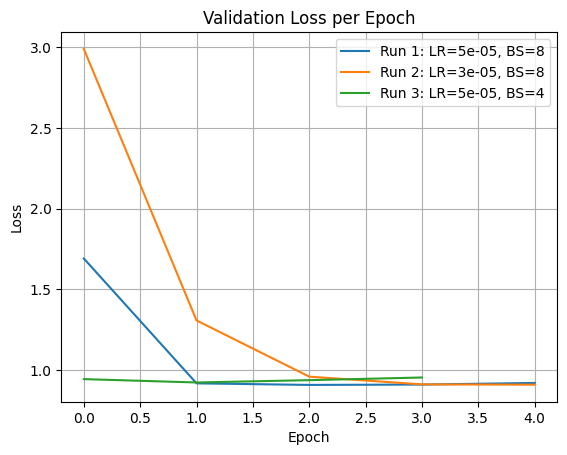

In [ ]:
# Plotting
for i, run in enumerate(all_results):
    plt.plot(run["losses"], label=f'Run {i+1}: LR={run["config"]["lr"]}, BS={run["config"]["bs"]}')
plt.title("Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

## üèÅ Final Training Setup ‚Äî BART Fine-Tuning

### üß† Model
- `facebook/bart-base`

### üõ†Ô∏è Best Hyperparameters (from Run 3)
- **Learning rate:** `5e-5`
- **Batch size:** `4`
- **Epochs:** `10` (with early stopping)
- **Weight decay:** `0.01`

### ‚úÖ Training Features
- **Evaluation & Save Strategy:** Every epoch
- **Early Stopping:** Enabled (`patience = 2`)
- **Predict with generate:** True (for text generation)
- **Logging:** Per epoch
- **Best model restored:** After training

### üìÇ Output
- Saved to `./final_bart_model`  
- `save_total_limit=2` ensures minimal storage use

---

This setup fine-tunes BART on your tone/style-conditioned quote generation task using the most effective configuration from the earlier grid search.


In [ ]:
# Final training setup with best config (Run 3)
from transformers import EarlyStoppingCallback

best_model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
best_args = Seq2SeqTrainingArguments(
    output_dir="./final_bart_model",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    weight_decay=0.01,
    predict_with_generate=True,
    logging_strategy="epoch",
    load_best_model_at_end=True,
    save_total_limit=2,
    report_to="none"
)

final_trainer = Seq2SeqTrainer(
    model=best_model,
    args=best_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorForSeq2Seq(tokenizer, best_model),
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

final_trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-19-783213046d0e>:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  final_trainer = Seq2SeqTrainer(


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3353: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=448, training_loss=1.2094019566263472, metrics={'train_runtime': 192.8586, 'train_samples_per_second': 23.229, 'train_steps_per_second': 5.807, 'total_flos': 136580966645760.0, 'train_loss': 1.2094019566263472, 'epoch': 4.0})

In [ ]:
import os
os.listdir("./final_bart_model")  # replace with actual output_dir path

['checkpoint-224', 'checkpoint-448']

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration
import torch

# Load fine-tuned model
model = BartForConditionalGeneration.from_pretrained("./final_bart_model/checkpoint-448")
tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")

# Prompts
prompts = [
    "Write a quote in a hopeful tone and poetic style.",
    "Write a quote in a reflective tone and poetic style.",
    "Write a quote in a thoughtful tone and conversational style.",
    "Write a quote in an empowering tone and poetic style.",
    "Write a quote about love or heartbreak in a minimalist style.",
    "Write a soulful quote with deep insight.",
    "Write a quote about healing and time in a poetic style.",
    "Write a quote about self-worth in a hopeful tone.",
    "Write a quote about loss in a gentle and introspective tone.",
    "Write a quote in a wise tone and lyrical style."
]

# Generation function
def generate_quote(prompt):
    input_text = prompt.replace("Write a quote", "Here's a quote")
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)

    summary_ids = model.generate(
        inputs["input_ids"],
        max_length=60,
        num_beams=4,
        temperature=0.9,
        top_k=50,
        top_p=0.95,
        do_sample=True,
        early_stopping=True
    )

    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)


# Generate and print quotes
for i, prompt in enumerate(prompts):
    quote = generate_quote(prompt)
    print(f"\nPrompt {i+1}: {prompt}")
    print(f"Generated Quote: {quote}\n")




Prompt 1: Write a quote in a hopeful tone and poetic style.
Generated Quote: There's so much to learn. So much to explore and explore. So little to make time for your interests.


Prompt 2: Write a quote in a reflective tone and poetic style.
Generated Quote: You will fall in love with a lot of people and sometimes, you'll love them forever. But you'll fall out of love entirely.


Prompt 3: Write a quote in a thoughtful tone and conversational style.
Generated Quote: You will fall in love with a lot of people and sometimes, you'll love them forever.


Prompt 4: Write a quote in an empowering tone and poetic style.
Generated Quote: You will fall in love with a lot of people and sometimes, you might love them forever. But again you'll fall out of love entirely.


Prompt 5: Write a quote about love or heartbreak in a minimalist style.
Generated Quote: You can beg for love, But you can't beg for it.


Prompt 6: Write a soulful quote with deep insight.
Generated Quote: There's so much I wa

## üß† Quote Generation Using Fine-Tuned BART

### üîç What‚Äôs Happening

1. **Model Loading**  
   - Loads your fine-tuned `facebook/bart-base` model from `checkpoint-448`.
   - Uses the corresponding BART tokenizer.

2. **Prompt Setup**  
   - Defines 10 natural language prompts like:
     ```
     "Write a quote in a hopeful tone and poetic style."
     ```

3. **Text Generation Function**
   - `generate_quote(prompt)` modifies the prompt slightly (e.g., replaces `"Write a quote"` with `"Here's a quote"`).
   - Tokenizes the input and passes it to the model.
   - Generates a quote using controlled decoding:
     - `do_sample=True`, `temperature=0.9`, `top_p=0.95`, `top_k=50`
     - `num_beams=4` for diverse and fluent output

4. **Quote Display**
   - Iterates through each prompt, generates a quote, and prints it alongside the prompt.

---

### ‚úÖ Summary

We're using our **fine-tuned BART model** to generate **short, stylistic quotes** from **natural language prompts**.  
This enables creative content generation with control over **tone** and **style**.


###üß† What is BART?

BART (Bidirectional and Auto-Regressive Transformers) is a sequence-to-sequence model developed by Facebook AI, designed for tasks like text generation, summarization, translation, and infilling.

---

###üîß Key Architecture Features

- Encoder-Decoder Structure:

  Similar to traditional seq2seq models, BART has:

  - An encoder that reads the input text

  - A decoder that generates the output text

- Bidirectional Encoder:

Like BERT, the encoder sees both left and right context ‚Äî useful for understanding full sentence meaning.

- Auto-Regressive Decoder:

Like GPT, the decoder generates tokens one by one, conditioned on previously generated ones.

- Denoising Pretraining:

BART is trained by corrupting input text (e.g., masking, shuffling) and learning to reconstruct it.
>This makes it excellent for tasks like infill, rewriting, and paraphrasing.





